In [1]:
import pandas as pd
from random import choice
from collections import Counter

In [2]:
a = list(range(9))
arr = []

<Axes: >

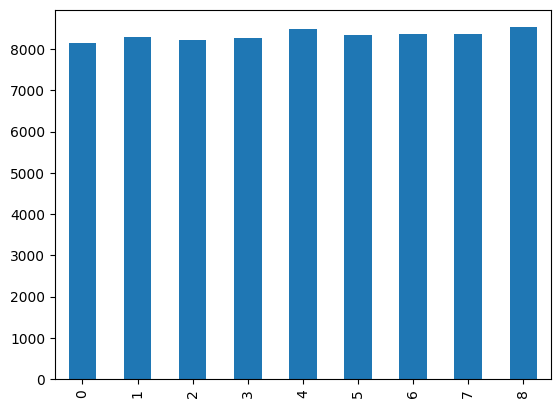

In [89]:
for i in range(1000):
    arr.append(choice(a))
count = Counter(arr)
count = pd.Series(count)
count.sort_index().plot.bar()

##### 1、随机实验
**随机试验**--具有下述三个特点的试验：  
（1）可以在相同的条件下重复地进行;  
（2）每次试验的可能结果不止一个，并且能事先明确试验的所有可能结果;  
（3）进行一次试验之前不能确定哪一个结果会出现;  

##### 2、样本空间、随机事件
**样本空间**--随机试验的所有可能结果组成的集合.  
**样本点**--样本空间的元素.  
**随机事件**--随机试验的样本空间的子集.  
**事件间的关系**：  
事件B包含事件A：事件A发生必导致事件发生时。若,则称事件A与事件相等。  
事件A与事件B的和事件：当且仅 当A，B中至少有一个发生时。  
事件A与事件B的积事件：当且仅当A,B同时发生时。  
事件A与事件B的差事件：当且仅当A发生、B不发生时。  
事件A与B是互不相容的或互斥的：事件 A与事件B不能同时发生。  
事件A与事件B互为逆事件.又称对立事件，事件A、B中必有一个发生，且仅有一个发生。  

##### 3、频率与概率
在相同的条件下,进行了n次试验，在这n次试验中，事件A发生的次数$n_A$称为事件A发生的频数。比值$\frac{n_A}{n}$称为事件A发生的频率。  
设E是随机试验,S是它的样本空间。对于E的每一事件人赋予一个实数，记为$P(A)$，称为事件A的概率。如果集合函数P(・)满足下列条件：非负性，规范性，可列可加性。

##### 4、等可能模型
试验的样本空间只包含有限个元素；  
试验中每个基本事件发生的可能性相冋。 

##### 5、条件概率
设A，B是两个事件，且$P(A)>0$, 称$P(B|A) = \frac{P(AB)}{P(A)}$为在事件A发生的条件下事件B发生的**条件概率**。  

**全概率公式**：  
设试验E的样本空间为S，A为E的事件，B1，B2，…Bn为S的一个划分，且$P(Bi)>0(i=1,2,…n)$，则:   
$P(A) = P(A|B_1)P(B_1) + P(A|B_2)P(B_2) + \cdots + P(A|B_n)P(B_n)$  
$P(A) = \sum_{i=1}^n{P(A|B_i)P(B_i)}$

**贝叶斯公式**：  
设试验E的样本空间为S，A为E的事件，B1，B2，…Bn为S的一个划分，且P(A)>0(i=1,2,…n)，P(Bi)>0(i=1,2,…n)，则:  
$P(B_i|A) = \frac{P(A|B_i)P(B_i)}{\sum^n_{j=1}{P(A|B_j)P(B_j)}}, i=1,2,3\cdots,n$

##### 6、独立性
设A，B是两个事件，如果满足等式: $P(AB) = P(A)P(B)$,则称事件A，B相互独立

##### 7、例子
有三个袋子，第一个袋子中有4个黑球，1个白球，第二个袋子中有3个黑球、3个白球，第三个袋子中有3个黑球、5个白球

因 --> 果  
现随机地取一个袋子，再从中取出一个球，则此球是白球的概率是多少？  
采用全概率公式：  
$P(A) = \frac{1}{3}*\frac{1}{5} + \frac{1}{3}*\frac{1}{2} + \frac{1}{3}*\frac{5}{8} = \frac{53}{120} = 44.2\%$

果 --> 因  
已知从袋子中取出的球为白球，则此球是从第二个袋子中取出的概率是多少？  
采用贝叶斯公式：  
$P(B_2|A) = \frac{\frac{1}{3} * \frac{1}{2}}{\frac{53}{120}} = \frac{20}{53}$  
简单解释：  
$P(B_2|A) = \frac{20}{53} > P(B_2) = \frac{1}{3}$  
$P(B_2)$称作先验概率，$P(B_2|A)$称作后验概率  
贝叶斯公式其实就是再获得证据之后更新概率的一个过程

<Axes: >

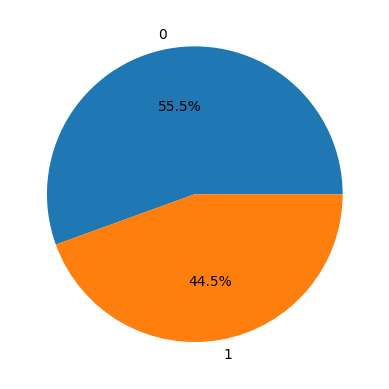

In [206]:
res = []
bags = [[0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]]
for i in range(100000):
    bag = choice(bags)
    num = choice(bag)
    res.append(num)

count = Counter(res)
count = pd.Series(count)
count = count.sort_index()
count.plot.pie(autopct="%1.1f%%")

<Axes: ylabel='num'>

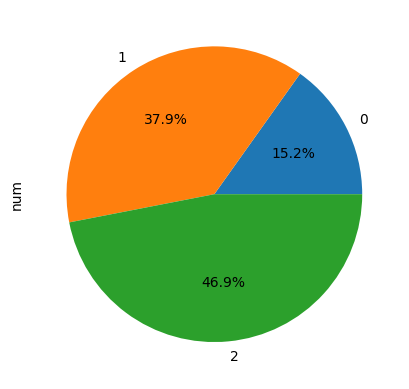

In [207]:
import numpy as np
res = []
bags = [[0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]]
times = 100000
data = np.empty((100000, 2), dtype=int)

for i in range(100000):
    bag = choice([0, 1, 2])
    num = choice(bags[bag])
    data[i] = [bag, num]

df = pd.DataFrame(data, columns=["bag", "num"])
demo = df[df["num"]==1].groupby("bag")["num"].sum()
demo
demo.plot.pie(autopct="%1.1f%%")